In [2]:
import torch

x = torch.tensor(6.7)
y = torch.tensor(0)

w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

/Users/radhika/Desktop/Personal/Interview related content/NLP/Introduction_to_PyTorch/.venv/lib/python3.12/site-packages/torch/_subclasses/functional_tensor.py:295: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:84.)
  cpu = _conversion_method_template(device=torch.device("cpu"))


In [1]:
## Binary cross entropy loss for scalar

def binary_cross_entropy(yhat, y):
    epsilon = 1e-8
    yhat = torch.clamp(yhat, epsilon, 1 - epsilon)
    return -(y * torch.log(yhat) + (1 - y) * torch.log(1 - yhat))

In [3]:
## Forward pass
z = w * x + b
y_hat = torch.sigmoid(z)

## Calculate the loss
loss = binary_cross_entropy(y_hat, y)

In [4]:
loss

tensor(6.7012, grad_fn=<NegBackward0>)

### Manual Derivation

In [5]:
dL_dy_pred = - (y / y_hat - (1 - y) / (1 - y_hat))
dy_pred_dz = y_hat * (1 - y_hat)
dz_dw = x
dz_db = 1

dL_dw = dL_dy_pred * dy_pred_dz * dz_dw
dL_db = dL_dy_pred * dy_pred_dz * dz_db

In [6]:
print("dL_dw: ", dL_dw)
print("dL_db: ", dL_db)

dL_dw:  tensor(6.6918, grad_fn=<MulBackward0>)
dL_db:  tensor(0.9988, grad_fn=<MulBackward0>)


### Using Autograd

In [7]:
loss.backward()

print("w.grad: ", w.grad)
print("b.grad: ", b.grad)

w.grad:  tensor(6.6918)
b.grad:  tensor(0.9988)


In [10]:
## Vectorized version
x = torch.tensor([1, 2, 3], dtype=torch.float32, requires_grad=True)
y = (x**2).mean()

y.backward()
x.grad

## This will be useful when we try to understand how outputs are computed against each weight in a neural network
## Because each output is made up of numerous weights, we can use this to understand how each weight contributes to the output

tensor([0.6667, 1.3333, 2.0000])

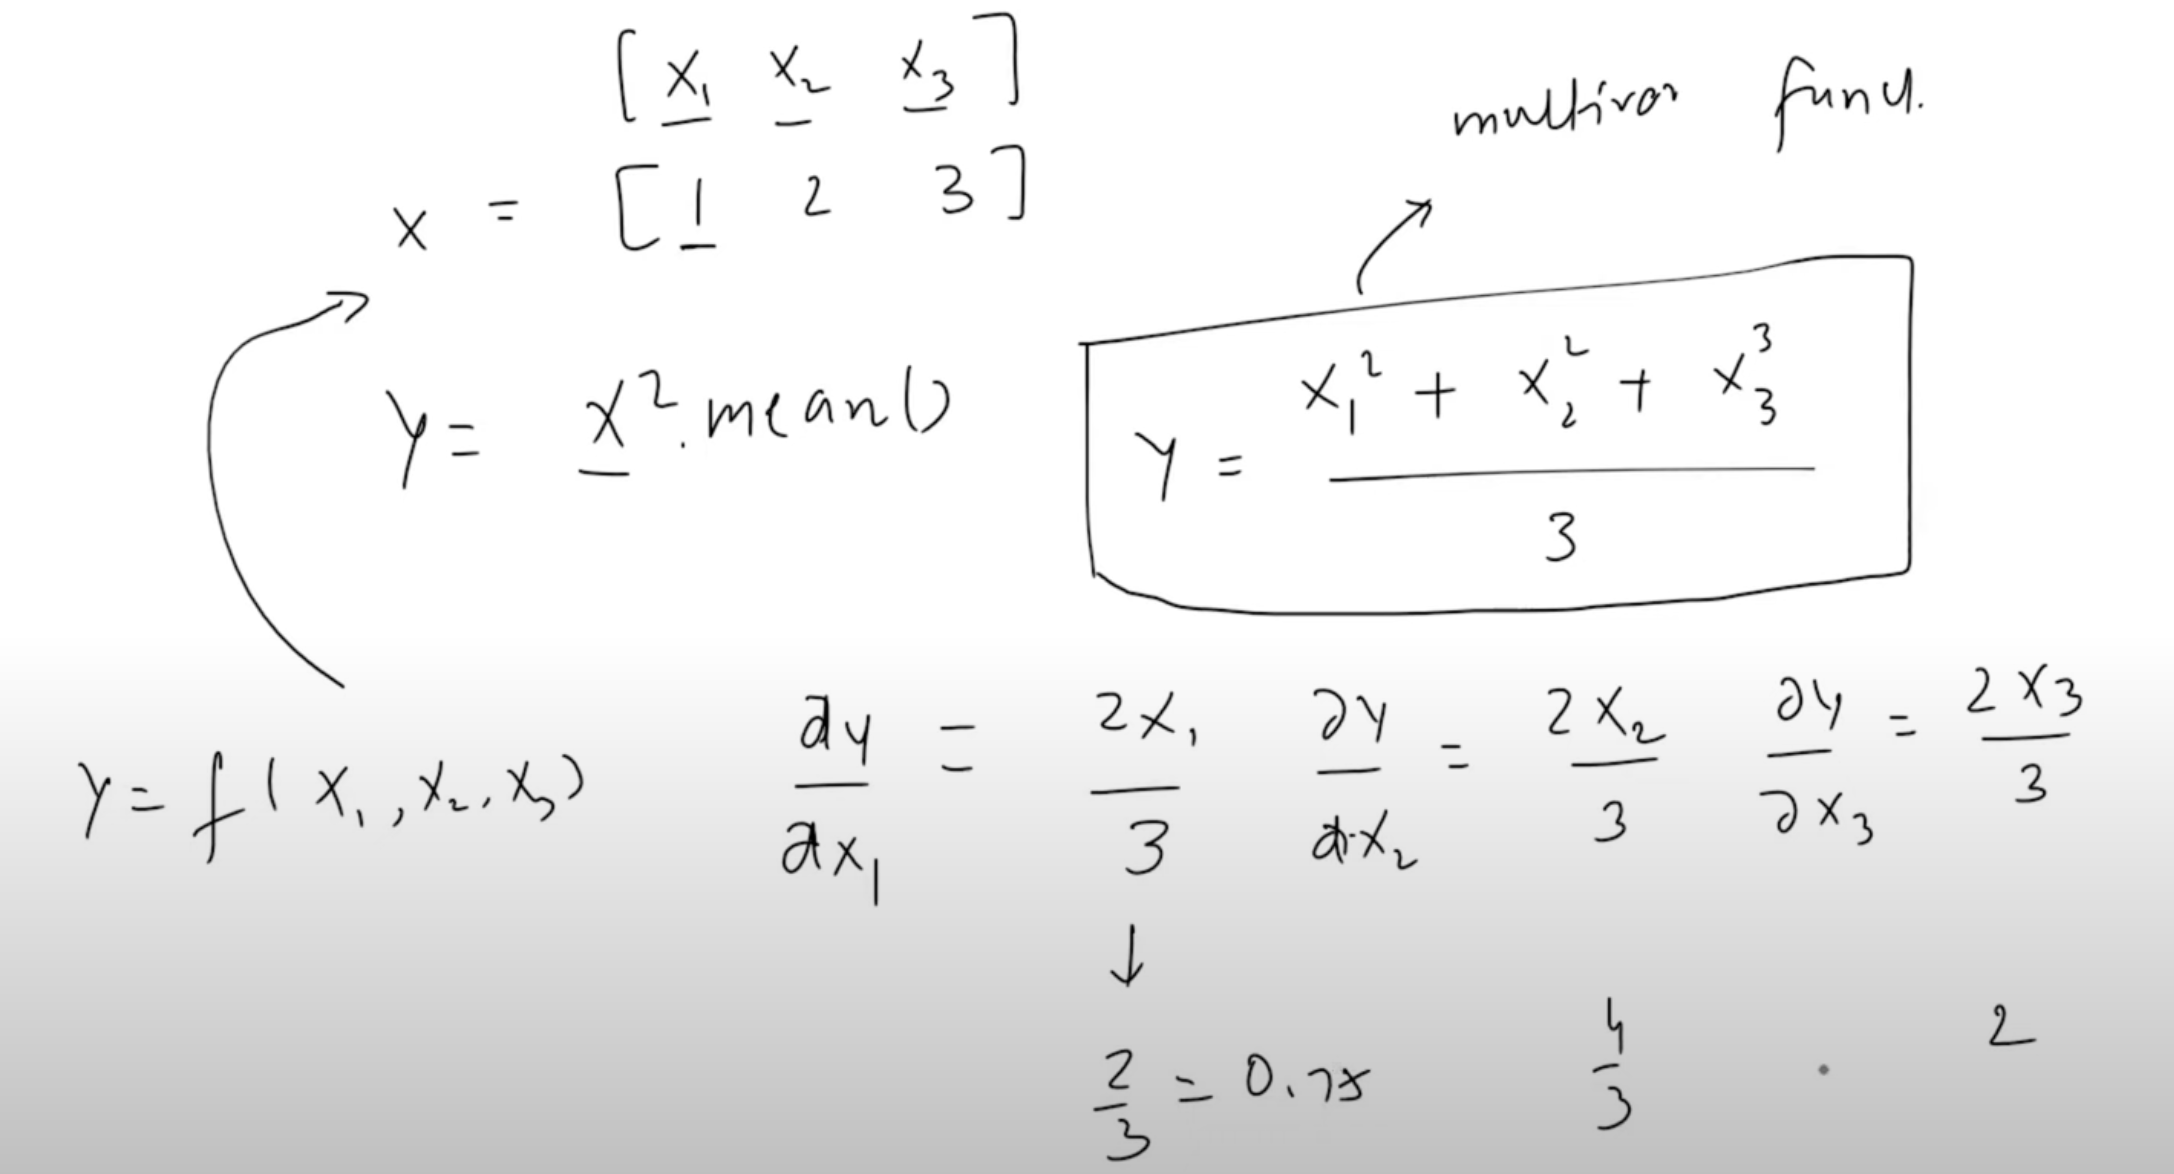

In [ ]:
## Why do we need to clear gradients?
## If we don't clear the gradients, the gradients will accumulate over time and the model will not learn properly
## gradients keep on adding!! that will cause issue in model iterations

## Clearing gradients
w.grad.zero_() #Inplce function zero_() is used to clear the gradients
b.grad.zero_()
print("w.grad: ", w.grad)
print("b.grad: ", b.grad)

### How to diable gradient tracking in inferring stage
Need to disable gradient tracking while inferring the model, in post-train phase

In [11]:
## Option 1: Requires grad = False
x.requires_grad_(False)
x

tensor([1., 2., 3.])

In [12]:
## Option 2: Detach
x = torch.tensor([1, 2, 3], dtype=torch.float32, requires_grad=True)
z = x.detach()
z

tensor([1., 2., 3.])

In [13]:
## Option 3: torch.no_grad()
x = torch.tensor([1, 2, 3], dtype=torch.float32, requires_grad=True)
with torch.no_grad():
    y = x * 2
    print(y)

tensor([2., 4., 6.])
